<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Use_GPU_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########################################################################################
#
# Use GPU Hardware accelator in Google Colab
# ML_DeepLearning_Predict_Income_Adult.py
#
# Predict whether income exceeds $50K/yr based on census data. 
# Also known as "Census Income" dataset.
# UCI data set name: Adult (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)
#
# Created by Jonggil Nam
# LinkedIn: https://www.linkedin.com/in/jonggil-nam-6099a162/
# Github: https://github.com/woodstone10
# e-mail: woodstone10@gmail.com
# phone: +82-10-8709-6299
###########################################################################################
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import sklearn.ensemble
import sklearn.neural_network
import sklearn.naive_bayes
import sklearn.tree
import sklearn.svm
import timeit

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Data set from UCI Machine Learning Repository
#  - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# Listing of attributes:
# 1. age: continuous.
# 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
#       State-gov, Without-pay, Never-worked.
# 3. fnlwgt: continuous.
# 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
#       9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# 5. education-num: continuous.
# 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
#       Married-spouse-absent, Married-AF-spouse.
# 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
#       Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,
#       Priv-house-serv, Protective-serv, Armed-Forces.
# 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# 10. sex: Female, Male.
# 11. capital-gain: continuous.
# 12. capital-loss: continuous.
# 13. hours-per-week: continuous.
# 14. native-country: United-States, Cambodia, England, Puerto-Rico,
#       Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
#       Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic,
#       Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,
#       El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# dataset from github (UCI)
#a = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.data', error_bad_lines=False)
a = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.data', sep= ',', header= None,skiprows=1)
b = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.test', sep= ',', header= None,skiprows=1)
df = pd.concat([a, b])
print(df.head())

   0                  1       2           3   ...  11  12              13      14
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States   <=50K
1  38            Private  215646     HS-grad  ...   0  40   United-States   <=50K
2  53            Private  234721        11th  ...   0  40   United-States   <=50K
3  28            Private  338409   Bachelors  ...   0  40            Cuba   <=50K
4  37            Private  284582     Masters  ...   0  40   United-States   <=50K

[5 rows x 15 columns]


In [ ]:
data = df
data.replace({
    ' <=50K':0,
    ' <=50K.':0,
    ' >50K':1,
    ' >50K.':1,
},inplace=True)
print(data.head())


   0                  1       2           3   ...  11  12              13 14
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States  0
1  38            Private  215646     HS-grad  ...   0  40   United-States  0
2  53            Private  234721        11th  ...   0  40   United-States  0
3  28            Private  338409   Bachelors  ...   0  40            Cuba  0
4  37            Private  284582     Masters  ...   0  40   United-States  0

[5 rows x 15 columns]


In [ ]:
# encoding using sklearn LabelEncoder (string to numeric)
transform_needed = [False, True, False, True, False, True, True, True, True, True, False, False, False, True, False]
encoded_data = np.zeros(shape=(data.shape[0], data.shape[1]), dtype=np.int)
for i in range(len(transform_needed)):
    if transform_needed[i]:
        tmp_data = data.iloc[:, i].tolist()
        encoder = sklearn.preprocessing.LabelEncoder()
        encoder.fit(tmp_data)
        encoded_data[:, i] = encoder.transform(tmp_data)
    else:
        encoded_data[:, i] = data.iloc[:, i].tolist()
print(encoded_data)


[[    50      6  83311 ...     13     39      0]
 [    38      4 215646 ...     40     39      0]
 [    53      4 234721 ...     40     39      0]
 ...
 [    38      4 374983 ...     50     39      0]
 [    44      4  83891 ...     40     39      0]
 [    35      5 182148 ...     60     39      1]]


In [ ]:
# encoded data X and y
X = encoded_data[:,:14]
y = encoded_data[:,14]
print(X)

[[    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 [    53      4 234721 ...      0     40     39]
 ...
 [    38      4 374983 ...      0     50     39]
 [    44      4  83891 ...      0     40     39]
 [    35      5 182148 ...      0     60     39]]


In [ ]:
# encoded data split into train 80%, test 20%
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print("total data size:",X.shape, "train data size:",X_train.shape, "test data size:",X_test.shape)


total data size: (48841, 14) train data size: (39072, 14) test data size: (9769, 14)


In [ ]:
# ------------------------------------------------------------------
# Model. Artificial Neural Network Deep Learning using Keras high-level API
# ------------------------------------------------------------------
def ANN():
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(32, input_shape=X_train[1].shape, activation='relu'),
          tf.keras.layers.Dropout(0.3), # for reduce overfitting
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dropout(0.3), # for reduce overfitting
          tf.keras.layers.Dense(8, activation='relu'),
          tf.keras.layers.Dropout(0.3), # for reduce overfitting
          tf.keras.layers.Dense(1, activation='sigmoid') # output is 1 or o, so sigmoid function is used
          ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
      loss=tf.keras.losses.binary_crossentropy, # prediction is 1 or 0, so binary_crossentropy is selected.
      metrics=['accuracy']
  )

  train = model.fit(X_train, y_train,
                      validation_split=0.3, # train data split into train 70%, validation 30%
                      epochs=20,
                      verbose=1 # online display with progressbar
                      )

  # Learning curve (loss and accuracy)
  train_acc = train.history['accuracy']
  train_loss = train.history['loss']
  val_acc = train.history['val_accuracy']
  val_loss = train.history['val_loss']

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(np.arange((len(train_acc))), train_acc, label='train accuracy')
  plt.plot(np.arange((len(val_acc))), val_acc, label='validation accuracy')
  plt.legend(loc='best')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.subplot(1, 2, 2)
  plt.plot(np.arange((len(train_loss))), train_loss, label='train loss')
  plt.plot(np.arange((len(val_loss))), val_loss, label='validation loss')
  plt.legend(loc='best')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.suptitle('Learning Curve \n Deep Learning of Adult (Predict Income >|<= 50k)', fontsize=15)
  plt.tight_layout()
  plt.show()

  test_loss, test_acc = model.evaluate(X_test, y_test)
  print("-"*30)
  print("Test Accuracy")
  print("-"*30)
  print("Deep Learning with Neural Network:", test_acc)

Epoch 1/20
855/855 [==============================] - 2s 2ms/step - loss: 1214.0880 - accuracy: 0.6444 - val_loss: 0.6618 - val_accuracy: 0.6934
Epoch 2/20
855/855 [==============================] - 1s 1ms/step - loss: 9.5673 - accuracy: 0.6855 - val_loss: 0.5642 - val_accuracy: 0.7614
Epoch 3/20
855/855 [==============================] - 1s 1ms/step - loss: 3.1025 - accuracy: 0.6998 - val_loss: 0.5802 - val_accuracy: 0.7610
Epoch 4/20
855/855 [==============================] - 1s 2ms/step - loss: 1.9315 - accuracy: 0.7142 - val_loss: 0.5552 - val_accuracy: 0.7614
Epoch 5/20
855/855 [==============================] - 1s 1ms/step - loss: 1.6255 - accuracy: 0.7277 - val_loss: 0.5512 - val_accuracy: 0.7614
Epoch 6/20
855/855 [==============================] - 1s 1ms/step - loss: 1.2732 - accuracy: 0.7314 - val_loss: 0.5500 - val_accuracy: 0.7614
Epoch 7/20
855/855 [==============================] - 1s 1ms/step - loss: 1.0816 - accuracy: 0.7381 - val_loss: 0.5497 - val_accuracy: 0.7614
Epo

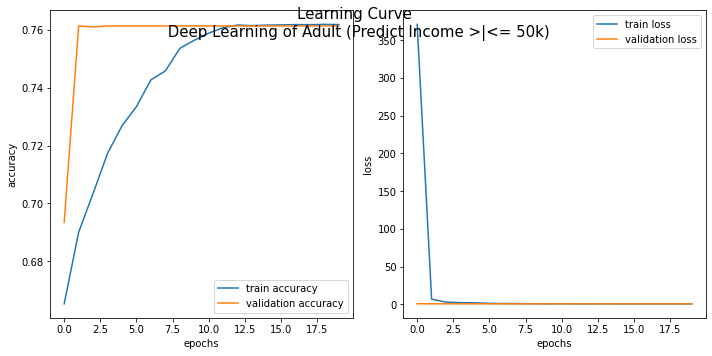

306/306 [==============================] - 0s 751us/step - loss: 0.5548 - accuracy: 0.7568
------------------------------
Test Accuracy
------------------------------
Deep Learning with Neural Network: 0.7567816376686096


In [ ]:
def cpu():
  with tf.device('/cpu:0'):
    ANN()
cpu()

Epoch 1/20
855/855 [==============================] - 3s 3ms/step - loss: 630.1441 - accuracy: 0.6609 - val_loss: 0.8613 - val_accuracy: 0.7650
Epoch 2/20
855/855 [==============================] - 3s 3ms/step - loss: 7.6079 - accuracy: 0.7236 - val_loss: 0.5723 - val_accuracy: 0.7638
Epoch 3/20
855/855 [==============================] - 3s 3ms/step - loss: 2.4237 - accuracy: 0.7394 - val_loss: 0.5941 - val_accuracy: 0.7522
Epoch 4/20
855/855 [==============================] - 3s 3ms/step - loss: 2.1541 - accuracy: 0.7433 - val_loss: 0.5544 - val_accuracy: 0.7634
Epoch 5/20
855/855 [==============================] - 3s 3ms/step - loss: 1.0388 - accuracy: 0.7524 - val_loss: 0.5462 - val_accuracy: 0.7634
Epoch 6/20
855/855 [==============================] - 3s 3ms/step - loss: 1.0851 - accuracy: 0.7524 - val_loss: 0.5487 - val_accuracy: 0.7633
Epoch 7/20
855/855 [==============================] - 3s 3ms/step - loss: 0.7537 - accuracy: 0.7614 - val_loss: 0.5480 - val_accuracy: 0.7624
Epoc

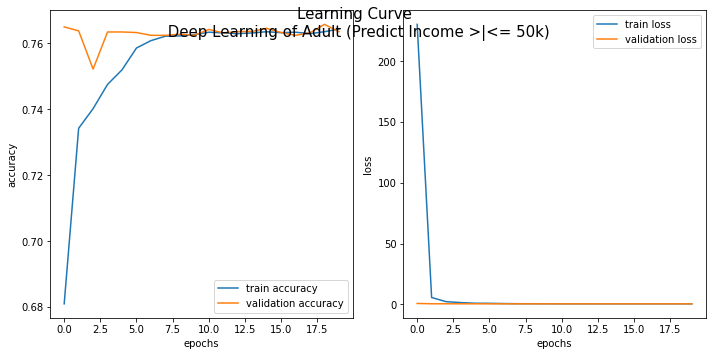

306/306 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7583
------------------------------
Test Accuracy
------------------------------
Deep Learning with Neural Network: 0.7583171129226685


In [26]:
def gpu():
  with tf.device('/device:GPU:0'):
    ANN()
gpu()

This is strage result! 
I expected GPU much faster than CPU
but, actual speed result is CPU faster than GPU
it may be that small neural network with few calculations is a poor fit for a GPU

In [27]:
# ------------------------------------------------------------------
# Model. Artificial Neural Network Deep Learning using Keras high-level API
# ------------------------------------------------------------------
def ANN2():
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(600, input_shape=X_train[1].shape, activation='relu'),
          tf.keras.layers.Dropout(0.3), # for reduce overfitting
          tf.keras.layers.Dense(200, activation='relu'),
          tf.keras.layers.Dropout(0.3), # for reduce overfitting
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dropout(0.3), # for reduce overfitting
          tf.keras.layers.Dense(1, activation='sigmoid') # output is 1 or o, so sigmoid function is used
          ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
      loss=tf.keras.losses.binary_crossentropy, # prediction is 1 or 0, so binary_crossentropy is selected.
      metrics=['accuracy']
  )

  train = model.fit(X_train, y_train,
                      validation_split=0.3, # train data split into train 70%, validation 30%
                      epochs=20,
                      verbose=1 # online display with progressbar
                      )

In [28]:
def cpu():
  with tf.device('/cpu:0'):
    ANN2()
cpu()

Epoch 1/20
855/855 [==============================] - 4s 4ms/step - loss: 541.1238 - accuracy: 0.6391 - val_loss: 0.6226 - val_accuracy: 0.7624
Epoch 2/20
855/855 [==============================] - 4s 4ms/step - loss: 2.5718 - accuracy: 0.7362 - val_loss: 0.5572 - val_accuracy: 0.7623
Epoch 3/20
855/855 [==============================] - 4s 4ms/step - loss: 1.8378 - accuracy: 0.7585 - val_loss: 0.5495 - val_accuracy: 0.7619
Epoch 4/20
855/855 [==============================] - 4s 4ms/step - loss: 1.5173 - accuracy: 0.7601 - val_loss: 0.5488 - val_accuracy: 0.7619
Epoch 5/20
855/855 [==============================] - 4s 4ms/step - loss: 0.7816 - accuracy: 0.7576 - val_loss: 0.5490 - val_accuracy: 0.7617
Epoch 6/20
855/855 [==============================] - 4s 5ms/step - loss: 0.7265 - accuracy: 0.7626 - val_loss: 0.5495 - val_accuracy: 0.7614
Epoch 7/20
855/855 [==============================] - 4s 5ms/step - loss: 0.7152 - accuracy: 0.7645 - val_loss: 0.5495 - val_accuracy: 0.7614
Epoc

In [29]:
def gpu():
  with tf.device('/device:GPU:0'):
    ANN2()
gpu()

Epoch 1/20
855/855 [==============================] - 3s 3ms/step - loss: 605.3713 - accuracy: 0.6714 - val_loss: 0.5427 - val_accuracy: 0.7662
Epoch 2/20
855/855 [==============================] - 3s 3ms/step - loss: 0.8955 - accuracy: 0.7619 - val_loss: 0.5407 - val_accuracy: 0.7675
Epoch 3/20
855/855 [==============================] - 3s 3ms/step - loss: 0.8928 - accuracy: 0.7656 - val_loss: 0.5444 - val_accuracy: 0.7649
Epoch 4/20
855/855 [==============================] - 3s 3ms/step - loss: 0.6581 - accuracy: 0.7598 - val_loss: 0.5445 - val_accuracy: 0.7649
Epoch 5/20
855/855 [==============================] - 3s 3ms/step - loss: 0.7428 - accuracy: 0.7605 - val_loss: 0.5416 - val_accuracy: 0.7668
Epoch 6/20
855/855 [==============================] - 3s 3ms/step - loss: 0.5694 - accuracy: 0.7614 - val_loss: 0.5466 - val_accuracy: 0.7634
Epoch 7/20
855/855 [==============================] - 3s 3ms/step - loss: 0.5871 - accuracy: 0.7612 - val_loss: 0.5410 - val_accuracy: 0.7673
Epoc

I changed the bigger number of node, and GPU is a bit faster than CPU
I guess GPU is much faster in big neural network, such as image/audio/language

In [ ]:
# ------------------------------------------------------------------
# Appendix. Comparison to other algorithms using Scikit-Learn
# refer to https://www.kaggle.com/overload10/income-prediction-on-uci-adult-dataset
# ------------------------------------------------------------------
# Model. Logistic Regression
model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression:",test_acc)

# Model. Random Forest
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Random Forest:",test_acc)

# Model. Neural Network
model = sklearn.neural_network.MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Neural Network:",test_acc)

# Model. Naive Bayes
model = sklearn.naive_bayes.GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Gaussian NB:",test_acc)

# Model. Decision Tree
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Classifier:",test_acc)

# Model. SVM
model = sklearn.svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("SVM:",test_acc)


Logistic Regression: 0.7917903572525335
Random Forest: 0.8529020370559934


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network: 0.7692701402395332
Gaussian NB: 0.7882075954550107
Decision Tree Classifier: 0.8094994369945747
SVM: 0.7908690756474562
